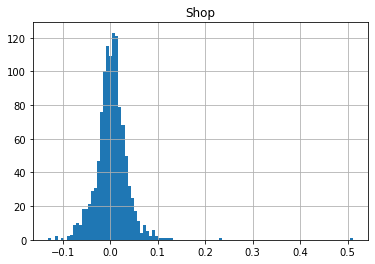

In [2]:
import pandas_datareader as web
import matplotlib.pyplot as plt

stocks = ['Shop']

startDate = '01/01/2001'
endDate = '01/01/2020'

data = web.DataReader(stocks,data_source='yahoo',start=startDate,end=endDate)['Adj Close']

dailyReturns = (data/data.shift(1))-1
dailyReturns.hist(bins=100)
plt.show()

In [26]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=dbb18ecc13a8acf88aef8a01f9d5f5f4d3aa5bfc2276df30803ccd4b03fa8639
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
#Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader.data as web
import pandas as pd
import datetime
import scipy.optimize as optimize
import fix_yahoo_finance as yf 
yf.pdr_override()

In [0]:
#Stocks and the dates
#stocks = ['AAPL','WMT','TSLA','GE','AMZN','DB']
stocks = ['AAPL','SHOP','BZUN','SQ','BABA','FB','MU','CY']
# 'BTCUSD=X'
startDate = '01/01/2010'
#endDate = '01/01/2017'
endDate = '01/01/2017'

In [0]:
# Downloads the data from yahoo
def download_data(stocks):
    data = web.DataReader(stocks,data_source="yahoo",start=startDate,end=endDate)['Adj Close']
    #data.columns = stocks
    #print(data.tail())
    return data

In [0]:
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

In [0]:
# We usually use natural logarithm for normalization purposes
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

In [0]:
def plot_daily_returns(returns):
    returns.plot(figsize=(10,5))
    plt.show()

In [0]:
# print out mean and covarience of stocks with [startDate,endDate]. There are 252 trading days in a year
def show_stats(returns):
    days = returns.shape[0]
    days = 252
    print(days)
    print(returns.mean()*days)
    print(returns.cov()*days)

In [0]:
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    print("Weights",weights, weights.shape)
    return weights

In [0]:
def calculate_portfolio_returns(returns,weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print("Expected portfolio returns:", portfolio_return)

In [0]:
def port_gen(weights, returns):
        weightsT = np.transpose(weights)
        print("Weights - T" , weightsT, weightsT.T.shape)

In [0]:
# expected portfolio varience
def calculate_portfolio_variance(returns, weights):
    portfolio_varience= np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    print("Expected variance:", portfolio_varience)

In [0]:
def generate_portfolios(weights,returns):
    preturns = []
    pvariances = []
    
    #Monte-Carlo sim: we generate several random weights -> so random portfolios!
    for i in range(7000):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))
    
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns,pvariances

In [0]:
def plot_plortfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns,c=returns/variances, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

In [0]:
def statistics(weights,returns):
    portfolio_return = np.dot(returns.mean()*252,weights.T,)
    #portfolio_return2 = np.sum(returns.mean()*weights)*252
    #print(portfolio_return,"P2",portfolio_return2)
    portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    
    # sharpe Ratio is a measure of returns vs volatility
    sharpe_ratio = portfolio_return/portfolio_volatility
    
    #Returns the three stats!
    return np.array([portfolio_return,portfolio_volatility,sharpe_ratio])

In [0]:
# [2] means that we want to maximize according to the sharpe-ratio
# Note: maximizing f(x)0 function is the same as minimizing -f(x)!
def min_func_sharpe(weights,returns):
    return -statistics(weights,returns)[2]

In [0]:
def optimize_portfolio(weights,returns):
    constraints=({'type':'eq','fun': lambda x: np.sum(x) - 1}) # the sum of the weeight is 1
    bounds = tuple((0,1) for x in range(len(stocks))) # the weights cab be 1 at most when 100% of money is invested in one stocl
    optimum = optimize.minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints)
    return optimum

In [0]:
def print_optimal_portfolio(optimum,returns):
    weights = optimum['x'].round(3)
    print(stocks)
    print("Optimal weights:",weights)
    print("expected return, volatility and Sharpe Ratio:",statistics(weights,returns))
    

In [0]:
def show_optimal_portfolio(optimum, returns, preturns,pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances,preturns,c=preturns/pvariances,marker="o")
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)
    plt.show()

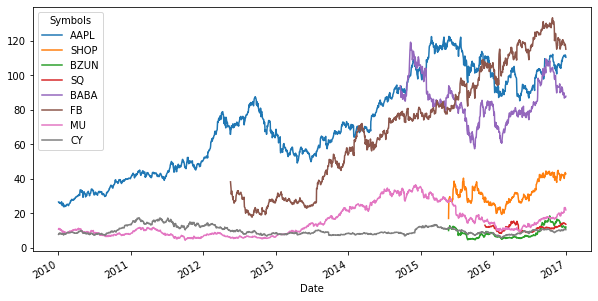

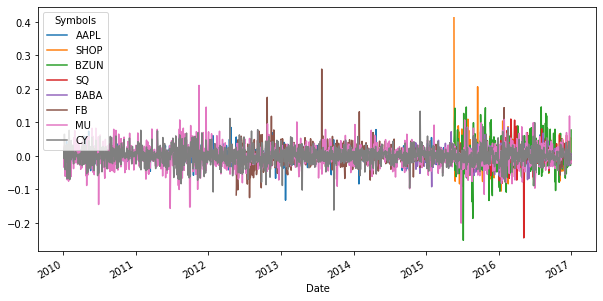

252
Symbols
AAPL    0.203962
SHOP    0.571298
BZUN    0.116203
SQ      0.037758
BABA   -0.029341
FB      0.238933
MU      0.100633
CY      0.042878
dtype: float64
Symbols      AAPL      SHOP      BZUN  ...        FB        MU        CY
Symbols                                ...                              
AAPL     0.068795  0.032293  0.030832  ...  0.021406  0.043753  0.036915
SHOP     0.032293  0.397339  0.077347  ...  0.044316  0.091939  0.060228
BZUN     0.030832  0.077347  0.544331  ...  0.047655  0.098765  0.054203
SQ       0.020205  0.066092  0.046380  ...  0.010261  0.073545  0.049066
BABA     0.023722  0.047121  0.094265  ...  0.027605  0.050553  0.040673
FB       0.021406  0.044316  0.047655  ...  0.155319  0.030396  0.027773
MU       0.043753  0.091939  0.098765  ...  0.030396  0.239060  0.105740
CY       0.036915  0.060228  0.054203  ...  0.027773  0.105740  0.153754

[8 rows x 8 columns]
Weights [0.07605048 0.22448067 0.08421587 0.10702784 0.08142639 0.13010189
 0.0132558

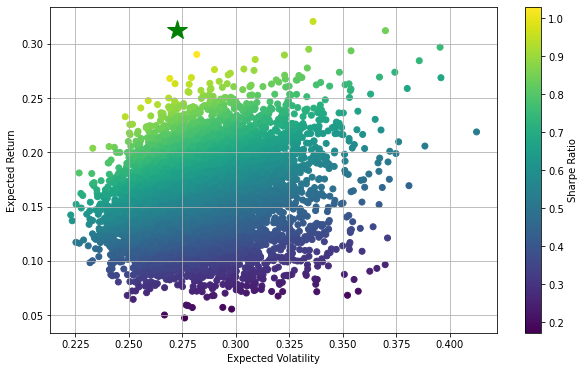

In [30]:
if __name__ == "__main__":
    data = download_data(stocks)
    show_data(data)
    returns = calculate_returns(data)
    plot_daily_returns(returns)
    show_stats(returns)
    weights = initialize_weights()
    calculate_portfolio_returns(returns, weights)
    calculate_portfolio_variance(returns, weights)
    vals = generate_portfolios(weights, returns)
    preturns = vals[0]
    pvariances = vals[1]
    #plot_plortfolios(vals[0],vals[1])
    #statistics(weights,returns)
    optimum = optimize_portfolio(weights, returns)
    print_optimal_portfolio(optimum,returns)
    show_optimal_portfolio(optimum,returns,preturns,pvariances)